In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# data from Ghia et al. for Re=100 on 129x129 grid
ghia_u = (
    np.array([0.0, 0.0547, 0.0625, 0.0703, 0.1016, 0.1719, 0.2813,
             0.4531, 0.5, 0.6172, 0.7344, 0.8516, 0.9531,
             0.9609, 0.9688, 0.9766, 1.0]),
    np.array([0.0, -0.03717, -0.04192, -0.04775, -0.06434,
             -0.10150, -0.15662, -0.21090, -0.20581, -0.13641,
             0.00332, 0.23151, 0.68717, 0.73722, 0.78871,
             0.84123, 1.0]))
ghia_v = (
    np.array([0.0, 0.0625, 0.0703, 0.0781, 0.0938, 0.1563, 0.2266,
             0.2344, 0.5, 0.8047, 0.8594, 0.9063, 0.9453,
             0.9531, 0.9609, 0.9688, 1.0]),
    np.array([0.0, 0.09233, 0.10091, 0.10890, 0.12317, 0.16077,
             0.17507, 0.17527, 0.05454, -0.24533, -0.22445,
             -0.16914, -0.10313, -0.08864, -0.07391, -0.05906, 0.0]))

In [52]:
def u_centerline(ny):
    ny = int(ny)
    desc = open("{:d}/u_centerline_{:05d}".format(ny, ny), mode='rb')
    y = np.fromfile(desc, count=ny)
    u = np.fromfile(desc, count=ny)
    return y, u

def v_centerline(nx):
    nx = int(nx)
    desc = open("{:d}/v_centerline_{:05d}".format(nx, nx), mode='rb')
    x = np.fromfile(desc, count=nx)
    v = np.fromfile(desc, count=nx)
    return x, v

def error_at_min(centerline):
    min_velocity = [ (d[0], d[-1].min()) for d in centerline]
    exact = min_velocity[-1][-1]
    return [ (d[0], d[1]-exact) for d in min_velocity]

def error_at_max(centerline):
    max_velocity = [ (d[0], d[-1].max()) for d in centerline]
    exact = max_velocity[-1][-1]
    return [ (d[0], d[1]-exact) for d in max_velocity]

In [55]:
u_center, v_center = [], []
for nx in (32, 64, 128, 256, 512):
    u_center.append((nx,) + u_centerline(nx))
    v_center.append((nx,) + v_centerline(nx))

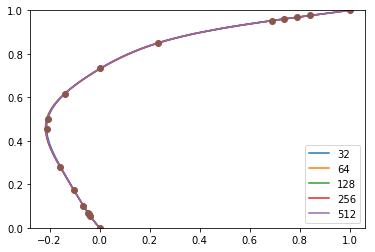

In [66]:
# u-velocity along y-centerline
for d in u_center:
    plt.plot(d[2], d[1], label=d[0])
plt.plot(ghia_u[1], ghia_u[0], 'o')
plt.ylim(0, 1)
plt.legend(loc='best')

In [57]:
# convergence of minimum velocity
error_at_min(u_center)

[(32, 0.0023787823900442151),
 (64, -0.0022824095674218448),
 (128, -0.0011681432905797928),
 (256, -0.00020420446449234686),
 (512, 0.0)]

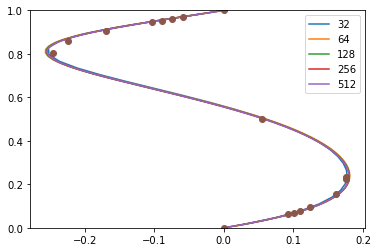

In [67]:
# v-velocity along x-centerline
for d in v_center:
    plt.plot(d[2], d[1], label=d[0])
plt.plot(ghia_v[1], ghia_v[0], 'o')
plt.ylim(0, 1)
plt.legend(loc='best')

In [59]:
# convergence of minimum velocity
error_at_min(v_center)

[(32, 0.002048376932185958),
 (64, -0.0023104225878443074),
 (128, -0.0012571675496827472),
 (256, -0.00023188509681287828),
 (512, 0.0)]

In [60]:
# convergence of minimum velocity
error_at_max(v_center)

[(32, -0.0025169731049650701),
 (64, 0.0011739078711177908),
 (128, 0.00071236002018740252),
 (256, 0.00012378042423000224),
 (512, 0.0)]